Last time we saw how endogenous demand constraints an agency's choices for the design of a transit system. The discussion was fairly general; we didn't actually solve for the design choices that meet each goal. Today we will use [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) to find the choices that fit our goals. In particular, we'll look at ridership maximization. 

If you are totally unfamiliar with Lagrange multipliers, come to office hours or discussion and ask questions. Even if you're not familiar, though, you'll probably be able to follow along and learn about them.

## Maximizing ridership

Suppose that you have a system with the demand curve

$$
Q = a - c_PP - \frac{c_W}{2F}
$$

and total costs ($TC$)

$$
TC = b + c_FF
$$

Your job is to maximize $Q$ while breaking even.

To solve we set up the problem as the equation...

$$
L = Q + \lambda (PQ - TC).
$$

Now we take the first-order conditions of $L$ with respect to $P$, $F$ and $\lambda$.

$$
\frac{\partial L}{\partial P } = Q_P + \lambda (PQ_P+Q)=0
$$

$$
\frac{\partial L}{\partial F } = Q_F + \lambda (PQ_F-c_F)=0
$$

$$
\frac{\partial L}{\partial \lambda } =PQ - TC=0
$$

The first and second equations become

$$
Q_P(1+\lambda P) = -\lambda Q
$$
and
$$
Q_F(1+\lambda P) = \lambda c_F.
$$


Dividing the one by the other yields

$$
\frac{Q_P}{Q_F} = \frac{Q}{c_F}.
$$

Now plug in the identities $Q_P=-c_P$ and $Q_F=c_W/(2F^2)$

$$
\frac{2c_PF^2}{c_W}=\frac{Q}{c_F}
$$

and solve for $F$ to obtain

$$
F^*(Q)=\sqrt{\frac{c_W}{2c_Fc_P}Q}.
$$

Now plug in $F^*(Q)$ into the third equation (the budget constraint) to obtain...

$$
P*Q - b - c_F*F^*(Q)$ = 0
$$

Get rid of the $P$ by writing it as the inverse demand curve

$$
P^*(Q) = \frac{1}{c_P}\left(a - Q - \frac{c_W}{2F^*(Q)} \right),
$$

which yields

$$
P^*(Q)Q - b - c_FF^*(Q) = 0.
$$

This is an equation in one variable, $Q$, and so you can solve it numerically. Below, is an example of how to do that using the scipy package in Python.Once you find $Q^*$, you can find $P^*$, $F^*$ and $\lambda$. How do you interpret $\lambda$? It's the amount of additional ridership you could obtain by relaxing the budget constraint by one unit---i.e., if you were allowed to lose one additional dollar.

[ 484.64108511]


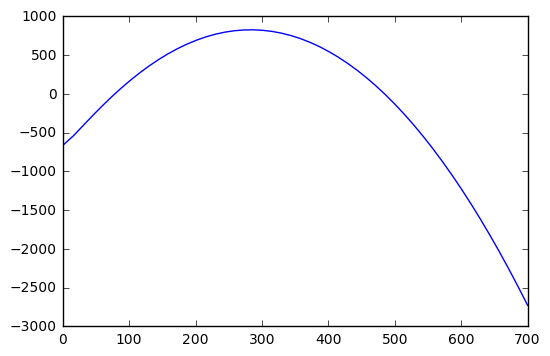

In [2]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
#the parameters
a = 600
c_P = 48
c_W = 566
c_F = 24
b = 641

def Fstar(Q):
    return np.sqrt(c_W * Q/ (2*c_F*c_P) )

def Pstar(Q):
    return 1./c_P*(a - Q - c_W/(2.*Fstar(Q)))

def breakEvenConstraint(Q):
    return Q*Pstar(Q) - b - c_F*Fstar(Q) # the equation for which you're going to find the root

solution = root(breakEvenConstraint,500) # the second number here 
print(solution.x)

plt.plot(np.linspace(2,700),breakEvenConstraint(np.linspace(2,700)))
plt.show()